# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
#human_files = np.array(glob("/data/lfw/*/*"))
#dog_files = np.array(glob("/data/dog_images/*/*/*"))
human_files = np.array(glob("data/lfw/*/*"))
dog_files = np.array(glob("data/dog_images/*/*/*"))
# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [4]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[2])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
#-----#switch off the picture---------
#plt.imshow(cv_rgb)
#plt.show()

Number of faces detected: 1


Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [6]:
#test
face_detector(dog_files[1])

False

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
- The percentage of the human images detected human = 0.98
- The percentage of the dog images detected human = 0.17

In [7]:
#from tqdm import tqdm

In [8]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.\
total1,total2 = 0, 0
for ii in range(0,len(human_files_short)):
    total1 += face_detector(human_files_short[ii])
    total2 += face_detector(dog_files_short[ii])
print("human accuracy=",total1 /len(human_files_short))
print("dog accuracy=",total2 /len(dog_files_short))


human accuracy= 1.0
dog accuracy= 0.07


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [10]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/ec2-user/.cache/torch/checkpoints/vgg16-397923af.pth


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [11]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    #max_size=224   
    image = Image.open(img_path).convert('RGB')
    #print("image.size",image.size)
   # if max(image.size) > max_size:
   #     size = max_size
   # else:
   #     size = max(image.size)       
    in_transform = transforms.Compose([
                        transforms.RandomResizedCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    #print(image.size())
    #print(image.dim())
    if use_cuda:
        image = image.cuda()
    output=VGG16(image)
    _, pred = torch.max(output, 1) 
    predict1=pred.item()
    return predict1 # predicted class index

In [12]:
#test
VGG16_predict(dog_files[4])

201

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [13]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    i= ((VGG16_predict(img_path)<=268) & (VGG16_predict(img_path)>=151))
    return i # true/false

In [14]:
#test
dog_detector(human_files[4])

False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__

- The percentage of the human images detected dog = 0.03
- The percentage of the dog images detected dog= 0.96

In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.\
total1,total2 = 0, 0
for ii in range(0,len(human_files_short)):
    total1 += dog_detector(human_files_short[ii])
    total2 += dog_detector(dog_files_short[ii])
print("human accuracy=",total1 /len(human_files_short))
print("dog accuracy=",total2 /len(dog_files_short))

human accuracy= 0.03
dog accuracy= 0.94


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [16]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [17]:
import os
import torchvision
from torchvision import datasets

#dataloaders(data_dir):
# define training, validation data, test data directories
#data_dir = '/data/dog_images/'
data_dir = 'data/dog_images/'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')
    
data_transform = transforms.Compose([transforms.RandomResizedCrop(128), 
                                          transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])])

# load and transform data using ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
#print('Num training images: ', len(train_data))
#print('Num validation images: ', len(valid_data))
#print('Num test images: ', len(test_data))
    
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
#print(train_loader.shape())
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

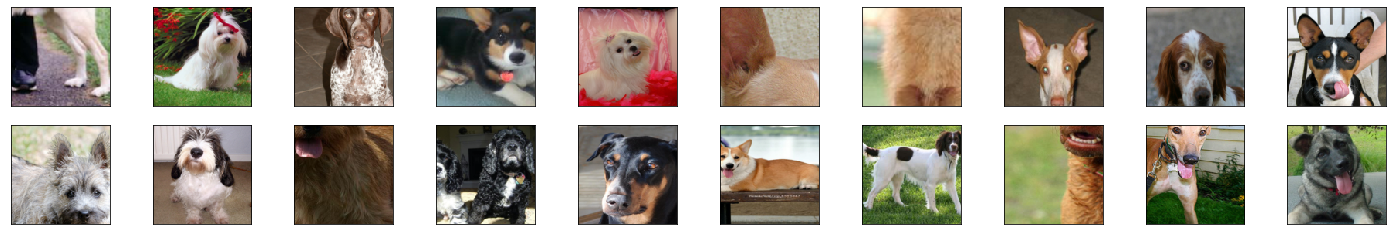

In [18]:
### Visualize some sample data
#See how they look like after transform
#train_loader.size()
# obtain one batch of training images 
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225])
dataiter = iter(loaders_scratch['train'])
#print(train_data.shpae)
im, la = dataiter.next()
#print(la)
#print(im.max())
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    tensor = im[idx]
    #print(tensor.max())
    tensor1=inv_normalize(tensor)
   #print(tensor1.max())
    image = tensor1.to("cpu").clone().detach()
    image = tensor1.numpy()
    #print (image.max())
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(image, (1, 2, 0)))

#for idx in np.arange(20):
    #ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    #plt.imshow(np.transpose(image[idx], (1,2,0)))
#    ax.set_title(classes[labels[idx]])
#im = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
#for idx in np.arange(20):
#    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
#    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
#    ax.set_title(classes[labels[idx]])


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
1. I used RandomResizedCrop, which randomly strechs and crops the images. It may help the model "see" the dog feature in more detailed.
2. The size I chose is 128. I have tried the size 256 and 64, but the size 256 make the speed of training too low.  Size 64 behaved not good in performance.
3. The advanced functions, such as flips and rotation, are not needed because the datasets are large enough so they may include essential information that a normal dog image might have. For example, a dog always stand on the ground so we don't need to rotate the picture in 180° to train.   
                                         

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
#cpu/gpu defined
use_cuda = torch.cuda.is_available()
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 20, 3, padding=1)
        #convolutional layer2
        self.conv2 = nn.Conv2d(20, 40, 3, padding=1)
        #convolutional layer3
        self.conv3 = nn.Conv2d(40, 80, 3, padding=1)
        #convolutional layer2
        #self.conv4 = nn.Conv2d(80, 10, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(4, 4)
        #size 4 pooling
        self.pools = nn.MaxPool2d(2, 2)
        #size 2 pooling
        self.fc1= nn.Linear(80*16*16,500)
        #self.fc2= nn.Linear(2000,500)
        self.fc3= nn.Linear(500,133)
        self.dropout = nn.Dropout(0.25)
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pools(F.relu(self.conv1(x)))
        ##(128-3+2)/1+1 =>(128-2)/2+1=64
        x = self.pools(F.relu(self.conv2(x)))
        ##(64-3+2)/1+1 =>(64-2)/2+1=32 
        x = self.pools(F.relu(self.conv3(x)))
        ##(32-3+2)/1+1 =>(32-2)/2+1=16
        #x = self.pool(F.relu(self.conv4(x)))
        ##(16-3+2)/1+1 =>(16-2)/2+1=8
        # flatten image input (Classifier) 
        x = x.view(-1, 80*16*16)
        x = F.relu(self.fc1(x))
        #x = self.dropout(x)
        #x = F.relu(self.fc2(x))
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = self.fc3(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
1. I designed the structure of convolution layer: 3 -> 20 ->40 ->80 and Maxpooled: (2,2). The more layers give the higher accuracy, but the more GPU time is needed. I have to choose the adequate number for it. After some failure because of the low speed of training, I decided to set the parameters closed to practice for CNNs for CIFAR Image Classification. In that project, the model works well in 10 kinds of transportations and animals classification. Maybe I can make my model a little bit complexity than it to get 10% higher accuraccy.

2. In the CNNs for CIFAR project, I use 3 ->16 ->32 in convoltion layers. Here, I add one convolution layer and make it deeper. I also noticed that the limited time I have, so I try to decrease the input number for the fully connected layer. In the begining, I use the maxpool (4,4) to decrease  xy dimension but it seems like losing too much position information for bad performance. So maxpool (2,2) is my only choice. Then the only thing I could do is to make the number of fully connected layers as small as possible.

3. After some tries, I found I can't speed up the training and gaining my accuracy simultaneously.
    (I want to attain the goal of 10% accuraccy in epoch 10 training.)
    By trying many times, I realized that it is impossible to set the default value of epoch to 10.
    So, I changed my strategy to make the valid loss decrease steady and always lower than the training loss 
    (by set dropout=0.25). Finally, it gives 15% accuracy by using 2 hours more GPU time.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [20]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(),lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        #print("begin=",epoch+1)
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            #print("Train: batch_idx start",batch_idx)
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss +=  ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            #print("batch_idx end",batch_idx)
        ######################    
        # validate the model #
        ######################
        print("next=",epoch+1)
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            #print("Train: batch_idx start",batch_idx)
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model


# train the model
#model_scratch = train(2, loaders_scratch, model_scratch, optimizer_scratch, 
#                      criterion_scratch, use_cuda, 'model_scratch_FORTEST.pt')
#model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
#                      criterion_scratch, use_cuda, 'model_scratch.pt')


#### NOTICE:
Here, the original training process were losed because of re-execution this cell. The original validation loss dacayed to about 2.0 after epoch 100. (I modified the training line to prevent the pretrained parameters to be replaced. Then I run it for epoch 1 to show the code could execute.)

In [23]:
# load the model that got the best validation accuracy
#if (use_cuda==0):
#    model_scratch.load_state_dict(torch.load('model_scratch.pt', map_location=lambda storage, loc: storage))
#if use_cuda:
#    model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%. 

Test Loss: 4.100338


Test Accuracy: 16% (136/836)

In [29]:
def test(loaders, model, criterion, use_cuda):
    #model.load_state_dict(torch.load(save_path))
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
#test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

In [29]:
# call test function    
#test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.100338


Test Accuracy: 16% (136/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [24]:
## TODO: Specify data loaders
import os
import torchvision
from torchvision import datasets

#dataloaders(data_dir):
# define training, validation data, test data directories
#data_dir = '/data/dog_images/'
data_dir = 'data/dog_images/'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')
    
# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                          transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])])

# load and transform data using ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
#print('Num training images: ', len(train_data))
#print('Num validation images: ', len(valid_data))
#print('Num test images: ', len(test_data))
    
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
#print(train_loader.shape())
loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [25]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer=models.vgg16(pretrained=True)

for param in model_transfer.features.parameters():
    param.requires_grad = False
#print(model_transfer)   
#print(model_transfer.classifier[6].in_features) 
#print(model_transfer.classifier[6].out_features) 
n_inputs = model_transfer.classifier[6].in_features
#final_layer = nn.Sequential(OrderedDict([
#                          ('fc1', nn.Linear(4096, 800)),
#                          ('relu', nn.ReLU()),
#                          ('fc2', nn.Linear(800, 133)),
#                          ('output', nn.LogSoftmax(dim=1))
#                          ]))
final_layer = nn.Linear(4096, 133)
model_transfer.classifier[6] = final_layer
print(final_layer)
print(model_transfer)
if use_cuda:
    model_transfer = model_transfer.cuda()

Linear(in_features=4096, out_features=133, bias=True)
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Ma

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
In this part, I use the pretrained vgg16 model to do the transform learning.
- Step 1: Freeze the all model parameter in the convolutional layer, then the pretrained result can be kept during the training loop.
- Step 2: Replace the final layer into the our version. Make sure the number of input are the same as the previous one, and the number of output is 133.
- The pretrained vgg16 model, which has been trained with thousands of kinds images, has ability to recognize objects in different features like shape, color or something really unnoticeable for human. In this project, different dog breeds also show the differences in these features. The thing we did is to modify the fully connected layers and make it can recognize the dogs by these features. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [26]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(),lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
#n_epochs=100
n_epochs=2
model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer
                        , criterion_transfer, use_cuda, 'model_transfer_FORTEST.pt')
#model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer
#                        , criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

next= 2
Epoch: 1 	Training Loss: 1.176765 	Validation Loss: 0.799632
Validation loss decreased (inf --> 0.799632).  Saving model ...
next= 3
Epoch: 2 	Training Loss: 0.981672 	Validation Loss: 0.768869
Validation loss decreased (0.799632 --> 0.768869).  Saving model ...


#### NOTICE:
Here, the original training process were losed because of re-execution this cell. The original validation loss dacayed to about 0.4 after about epoch 30 training. (I modified the training line to prevent the pretrained parameters to be replaced. Then I run it to show the code could execute. You will find the model_transfer.pt and no model_transfer_FORTEST.pt in the folder. The reason is that I deleted the useless one for its large data size.  )

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

Test Loss: 0.829862
Test Accuracy: 78% (653/836)

In [27]:
use_cuda = torch.cuda.is_available()
# load the model that got the best validation accuracy (uncomment the line below)
if (use_cuda==0):
    model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=lambda storage, loc: storage))
if use_cuda:
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [31]:
#test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [32]:
class_names =['Affenpinscher', 'Afghan hound', 'Airedale terrier', 'Akita', 'Alaskan malamute', 'American eskimo dog', 'American foxhound', 'American staffordshire terrier', 'American water spaniel', 'Anatolian shepherd dog', 'Australian cattle dog', 'Australian shepherd', 'Australian terrier', 'Basenji', 'Basset hound', 'Beagle', 'Bearded collie', 'Beauceron', 'Bedlington terrier', 'Belgian malinois', 'Belgian sheepdog', 'Belgian tervuren', 'Bernese mountain dog', 'Bichon frise', 'Black and tan coonhound', 'Black russian terrier', 'Bloodhound', 'Bluetick coonhound', 'Border collie', 'Border terrier', 'Borzoi', 'Boston terrier', 'Bouvier des flandres', 'Boxer', 'Boykin spaniel', 'Briard', 'Brittany', 'Brussels griffon', 'Bull terrier', 'Bulldog', 'Bullmastiff', 'Cairn terrier', 'Canaan dog', 'Cane corso', 'Cardigan welsh corgi', 'Cavalier king charles spaniel', 'Chesapeake bay retriever', 'Chihuahua', 'Chinese crested', 'Chinese shar-pei', 'Chow chow', 'Clumber spaniel', 'Cocker spaniel', 'Collie', 'Curly-coated retriever', 'Dachshund', 'Dalmatian', 'Dandie dinmont terrier', 'Doberman pinscher', 'Dogue de bordeaux', 'English cocker spaniel', 'English setter', 'English springer spaniel', 'English toy spaniel', 'Entlebucher mountain dog', 'Field spaniel', 'Finnish spitz', 'Flat-coated retriever', 'French bulldog', 'German pinscher', 'German shepherd dog', 'German shorthaired pointer', 'German wirehaired pointer', 'Giant schnauzer', 'Glen of imaal terrier', 'Golden retriever', 'Gordon setter', 'Great dane', 'Great pyrenees', 'Greater swiss mountain dog', 'Greyhound', 'Havanese', 'Ibizan hound', 'Icelandic sheepdog', 'Irish red and white setter', 'Irish setter', 'Irish terrier', 'Irish water spaniel', 'Irish wolfhound', 'Italian greyhound', 'Japanese chin', 'Keeshond', 'Kerry blue terrier', 'Komondor', 'Kuvasz', 'Labrador retriever', 'Lakeland terrier', 'Leonberger', 'Lhasa apso', 'Lowchen', 'Maltese', 'Manchester terrier', 'Mastiff', 'Miniature schnauzer', 'Neapolitan mastiff', 'Newfoundland', 'Norfolk terrier', 'Norwegian buhund', 'Norwegian elkhound', 'Norwegian lundehund', 'Norwich terrier', 'Nova scotia duck tolling retriever', 'Old english sheepdog', 'Otterhound', 'Papillon', 'Parson russell terrier', 'Pekingese', 'Pembroke welsh corgi', 'Petit basset griffon vendeen', 'Pharaoh hound', 'Plott', 'Pointer', 'Pomeranian', 'Poodle', 'Portuguese water dog', 'Saint bernard', 'Silky terrier', 'Smooth fox terrier', 'Tibetan mastiff', 'Welsh springer spaniel', 'Wirehaired pointing griffon', 'Xoloitzcuintli', 'Yorkshire terrier']

In [33]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
data_transfer = {'train': train_data, 'valid': valid_data, 'test': test_data}
#You can get the class name by the follwing.
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
#print(class_names)
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image
    image1 = Image.open(img_path).convert('RGB')
        
    in_transform = transforms.Compose([
                        transforms.CenterCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    image = in_transform(image1)[:3,:,:].unsqueeze(0)
    #print(image.size())
    #print(image.dim())
    if use_cuda:
            image = image.cuda()
    output=model_transfer(image)
    _, pred = torch.max(output, 1) 
    predict1=pred.item()
    breed = class_names[predict1]
    return breed

In [34]:
predict_breed_transfer("images/cat.jpg")

'Akita'

In [35]:
import sys
#Return the 1st and 2nd possible breed of the dog.
def predict_breed_transfer_mix(img_path):
    # load the image
    image1 = Image.open(img_path).convert('RGB')
        
    in_transform = transforms.Compose([
                        transforms.CenterCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    image = in_transform(image1)[:3,:,:].unsqueeze(0)
    #print(image.size())
    #print(image.dim())
    if use_cuda:
            image = image.cuda()
    output=model_transfer(image)
    m=nn.Softmax(dim=1)
    output=m(output)
    predmax1,max1 = torch.max(output, 1)
    predmin1,min1 = torch.min(output, 1)
    #print(max1.item(),predmax1)
    #pred = torch.max(output, 1) 
    #predict1=pred.item()
    output[0][max1.item()]=predmin1-1.0
    predmax2, max2 = torch.max(output, 1)
    breed1 = class_names[max1]
    breed2 = class_names[max2]
    dog =  [[breed1,predmax1]]
    if (predmax1/predmax2 <2.0 ):
        result=breed1+" and "+breed2
        #dog = [[breed1,predmax1], [breed2,predmax2]]
    else:
        result=breed1
    #print(len(dog))
    #print(max1, predmax1)
    #print(max2, predmax2)
    return result

In [36]:
predict_breed_transfer_mix("images/cat.jpg")

'Akita'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

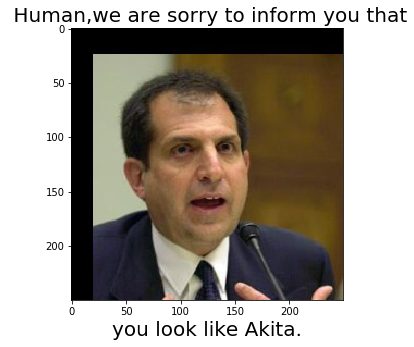

In [37]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    image = Image.open(img_path).convert('RGB')
    #human_face,dog_detect=0,0 #test
    human_face = face_detector(img_path)
    dog_detect = dog_detector(img_path)
    normal=1
    hello=""
    breed=""
    who=""
    
    #if (human_face and dog_detect):
    #    who="Alien"
    #    normal=0
    #breed = predict_breed_transfer(img_path)
    breed = predict_breed_transfer_mix(img_path)
    if (human_face and normal):
        who=" Human"
        hello=who+",we are sorry to inform you that"
        hello1="you look like "+ breed+"." 
    #If human_detect and dog_detect are true, I think I'll believe the dog_detect model. 
    #The reason is that accuraccy in the dog_detect is higher than the face_detect.
    if (dog_detect and normal):
        who=" Dog"
        hello=who+",we guess that"
        hello1="your parents are "+ breed+"."  
    #breed="fantasic dog"
   # hello=who+",we are sorry to inform you that"
    #hello1="your parents are "+ breed 
    
    if (human_face ==0 and dog_detect ==0):
        hello="You don't look like human or dog,"
        hello1=" and perhaps it is a good thing."
    fig = plt.figure(figsize=(10,5))
    ax=fig.add_subplot(1,1,1)
    plt.imshow(image)
    ax.set_title(hello,fontsize=20)
    ax.set_xlabel(hello1,fontsize=20)
run_app(human_files[2])

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
I think the outputs are worse than I expected.

There are 3 human and 3 dogs.
Result:
Human: 2 correct and 1 wrong.
Dog: Only 1 breed prediction correct.
     There are 1 breed prediction failed,and 1 dog recognization failed.
Possble improvements of algorithm:
1. Increase the fully connected layers in the output. 
2. Increase the convolutional layers by using the vgg19 model for transfer learning. 
3. Train the data in a large batch size. It may take more time but its valid loss will decrease steadily.
4. For the classifiaction between human and dog, I guess that we can use the more specific model to do classifcation.
   Maybe we should modify the vgg16 final layer to 2 outputs: human and dog, and we training them with the dog and human pictures.

In [38]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
    #run_app(file)

### Additional tests below:

In [39]:
#run_app("images/bull_terrier.jpg")

In [40]:
#run_app("images/man2.jpg")

In [41]:
#run_app("images/italian_greyhound.jpg")

In [42]:
#run_app("images/cat.jpg")